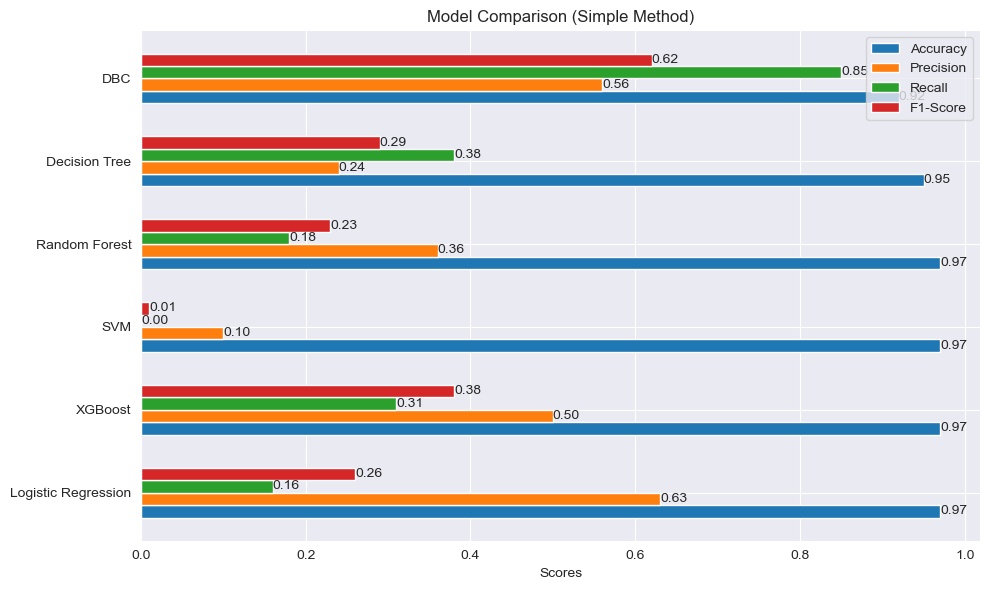

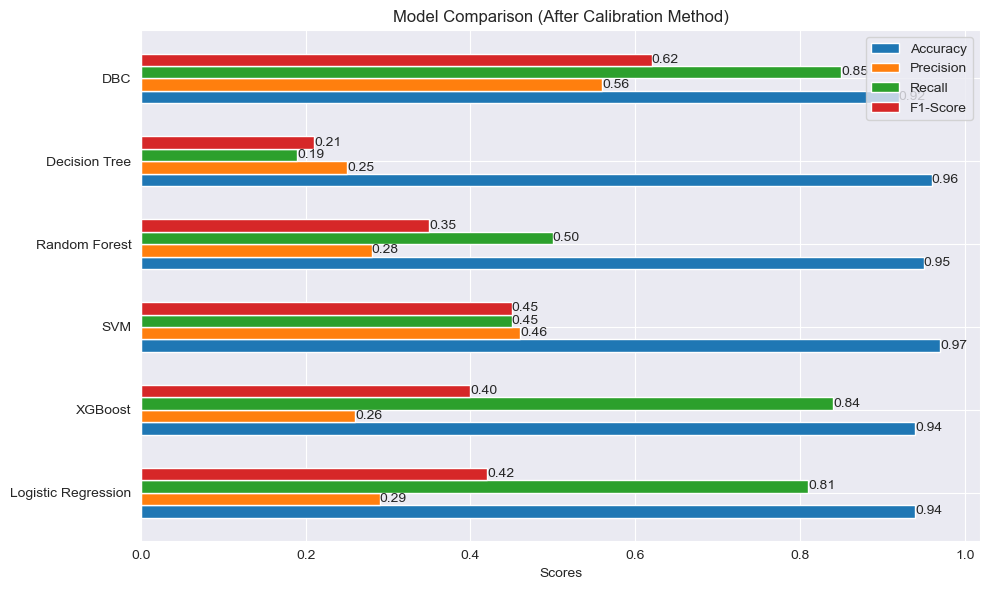

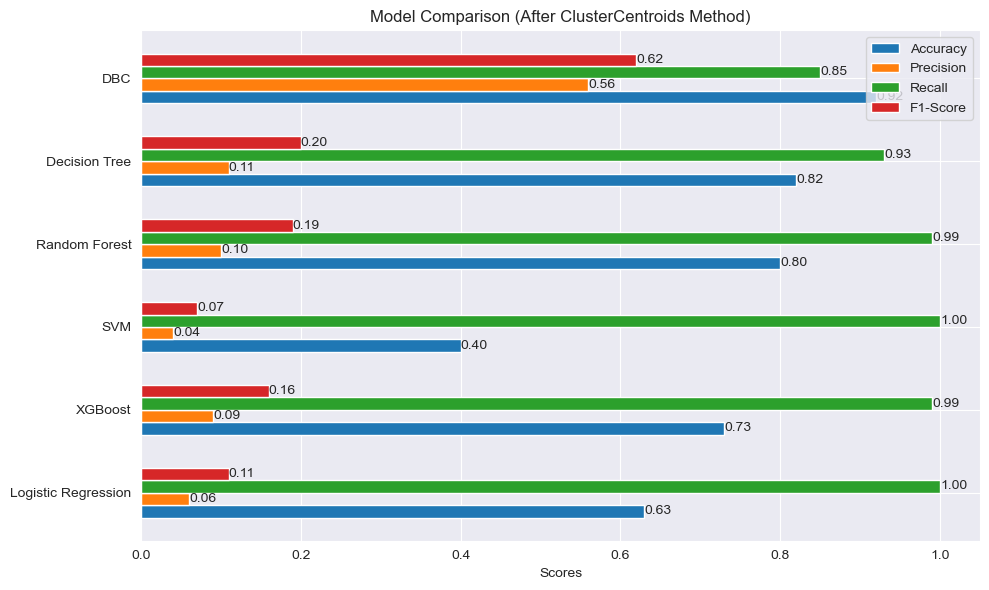

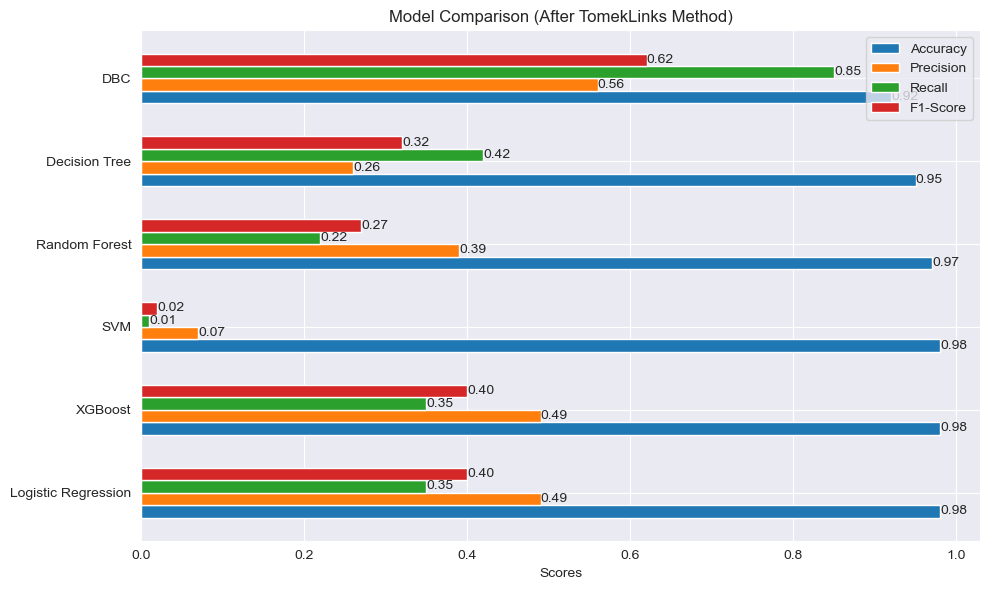

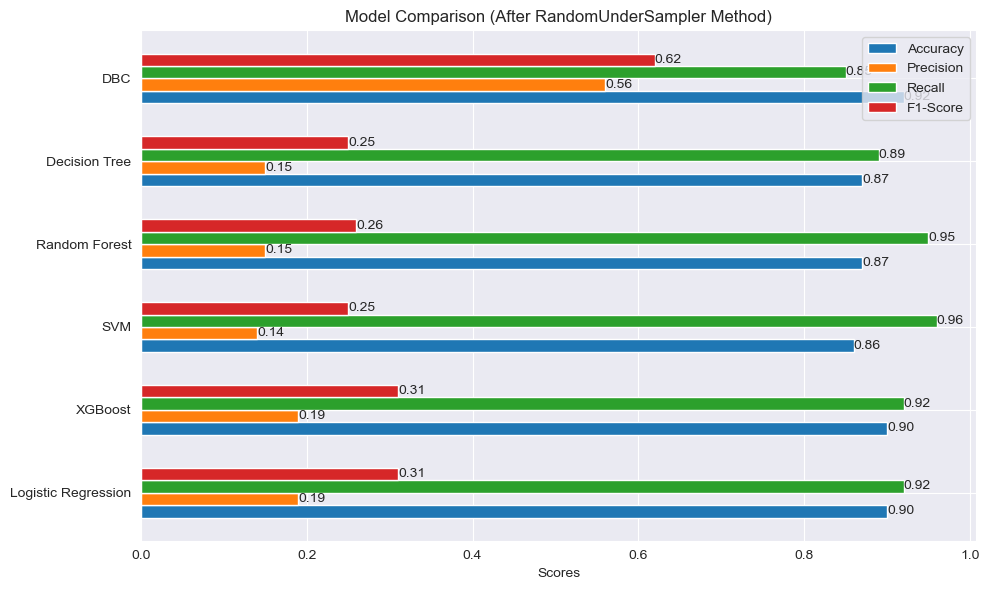

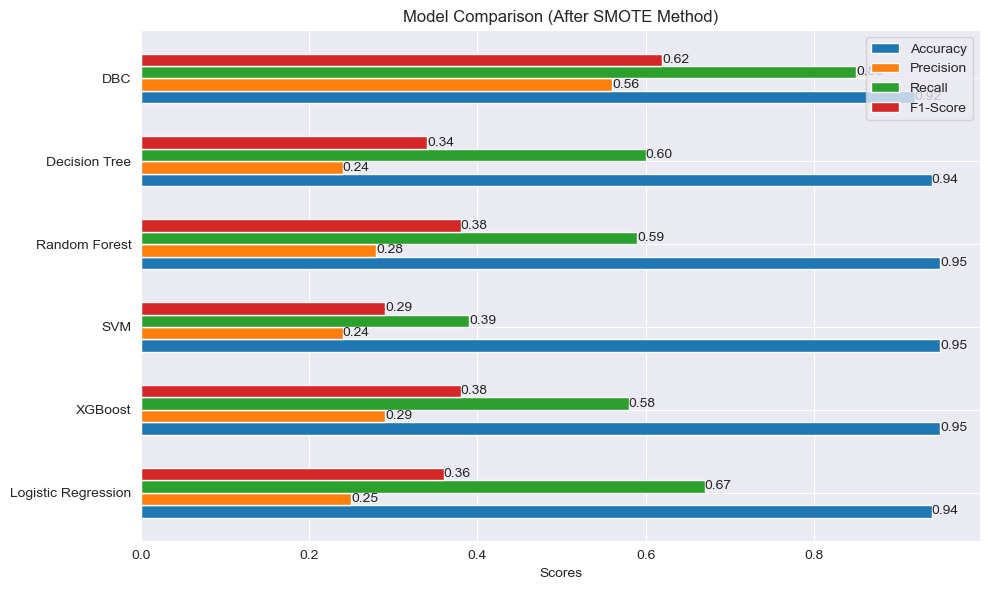

In [1]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Decision Tree', 'DBC']
methods = {
    'Simple': {
        'accuracy': [0.97, 0.97, 0.97, 0.97, 0.95, 0.92],
        'precision': [0.63, 0.50, 0.10, 0.36, 0.24, 0.56],
        'recall': [0.16, 0.31, 0.00, 0.18, 0.38, 0.85],
        'f1_score': [0.26, 0.38, 0.01, 0.23, 0.29, 0.62]
    },
    'After Calibration': {
        'accuracy': [0.94, 0.94, 0.97, 0.95, 0.96, 0.92],
        'precision': [0.29, 0.26, 0.46, 0.28, 0.25, 0.56],
        'recall': [0.81, 0.84, 0.45, 0.50, 0.19, 0.85],
        'f1_score': [0.42, 0.40, 0.45, 0.35, 0.21, 0.62]
    },
    'After ClusterCentroids': {
        'accuracy': [0.63, 0.73, 0.40, 0.80, 0.82, 0.92],
        'precision': [0.06, 0.09, 0.04, 0.10, 0.11, 0.56],
        'recall': [1.00, 0.99, 1.00, 0.99, 0.93, 0.85],
        'f1_score': [0.11, 0.16, 0.07, 0.19, 0.20, 0.62]
    },
    'After TomekLinks': {
        'accuracy': [0.98, 0.98, 0.98, 0.97, 0.95, 0.92],
        'precision': [0.49, 0.49, 0.07, 0.39, 0.26, 0.56],
        'recall': [0.35, 0.35, 0.01, 0.22, 0.42, 0.85],
        'f1_score': [0.40, 0.40, 0.02, 0.27, 0.32, 0.62]
    },
    'After RandomUnderSampler': {
        'accuracy': [0.90, 0.90, 0.86, 0.87, 0.87, 0.92],
        'precision': [0.19, 0.19, 0.14, 0.15, 0.15, 0.56],
        'recall': [0.92, 0.92, 0.96, 0.95, 0.89, 0.85],
        'f1_score': [0.31, 0.31, 0.25, 0.26, 0.25, 0.62]
    },
    'After SMOTE': {
        'accuracy': [0.94, 0.95, 0.95, 0.95, 0.94, 0.92],
        'precision': [0.25, 0.29, 0.24, 0.28, 0.24, 0.56],
        'recall': [0.67, 0.58, 0.39, 0.59, 0.60, 0.85],
        'f1_score': [0.36, 0.38, 0.29, 0.38, 0.34, 0.62]
    },
}

# Creating the plots for all methods
for method, data in methods.items():
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.15
    index = np.arange(len(models))

    # Creating bars for each metric
    bar1 = ax.barh(index, data['accuracy'], bar_width, label='Accuracy')
    bar2 = ax.barh(index + bar_width, data['precision'], bar_width, label='Precision')
    bar3 = ax.barh(index + 2 * bar_width, data['recall'], bar_width, label='Recall')
    bar4 = ax.barh(index + 3 * bar_width, data['f1_score'], bar_width, label='F1-Score')

    # Adding labels and title
    ax.set_xlabel('Scores')
    ax.set_title(f'Model Comparison ({method} Method)')
    ax.set_yticks(index + 1.5 * bar_width)
    ax.set_yticklabels(models)
    ax.legend()

    # Adding values on bars
    for bars in [bar1, bar2, bar3, bar4]:
        for bar in bars:
            ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
                    va='center', ha='left')

    # Display the plot
    plt.tight_layout()
    plt.show()


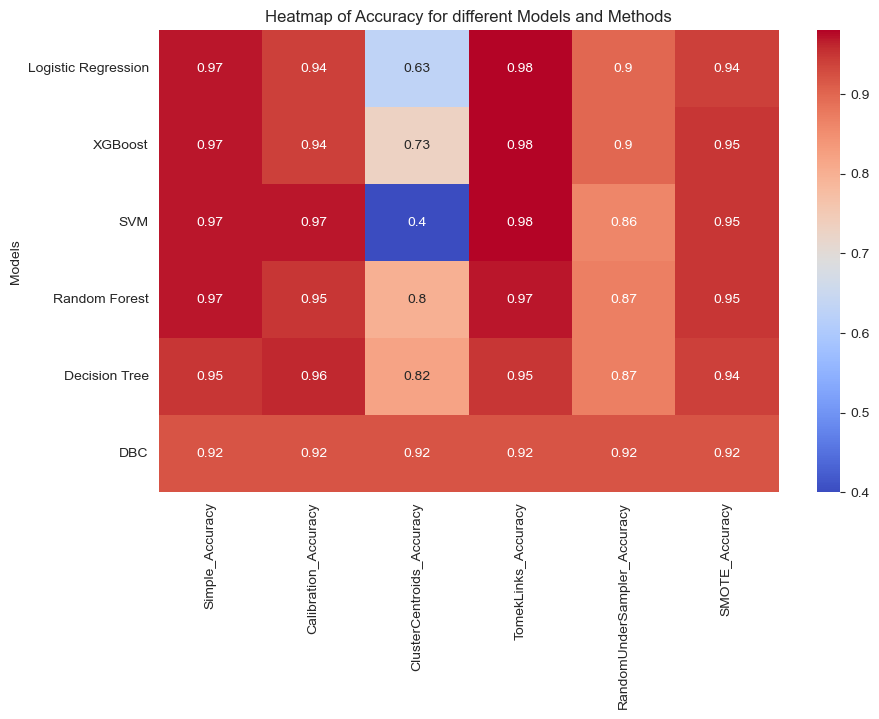

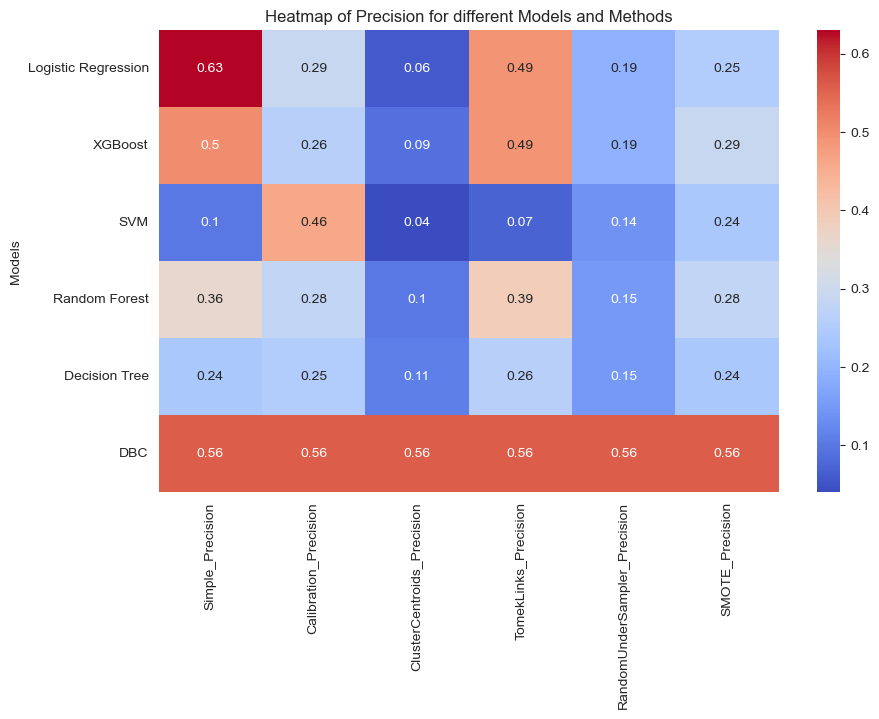

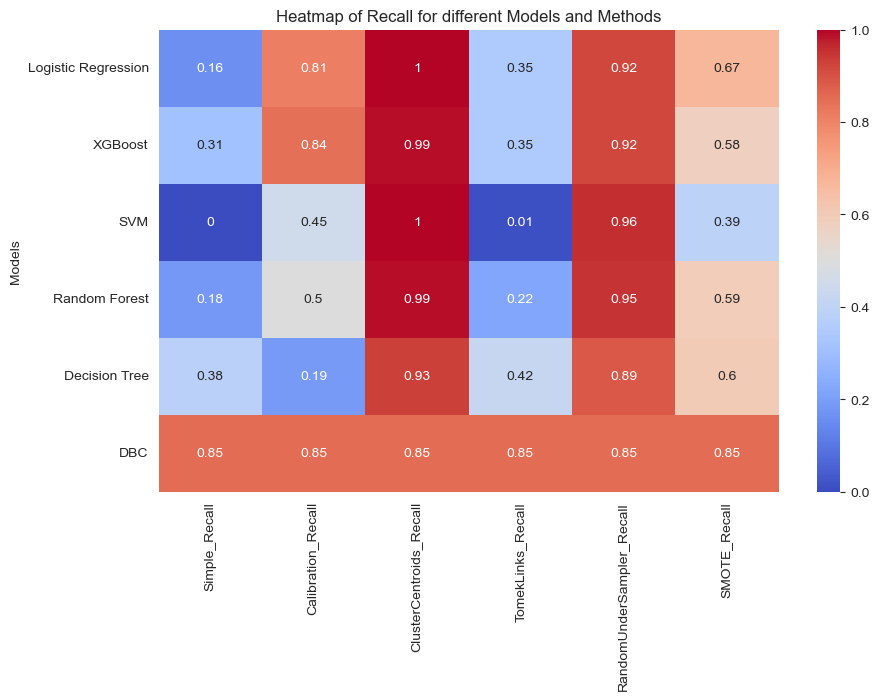

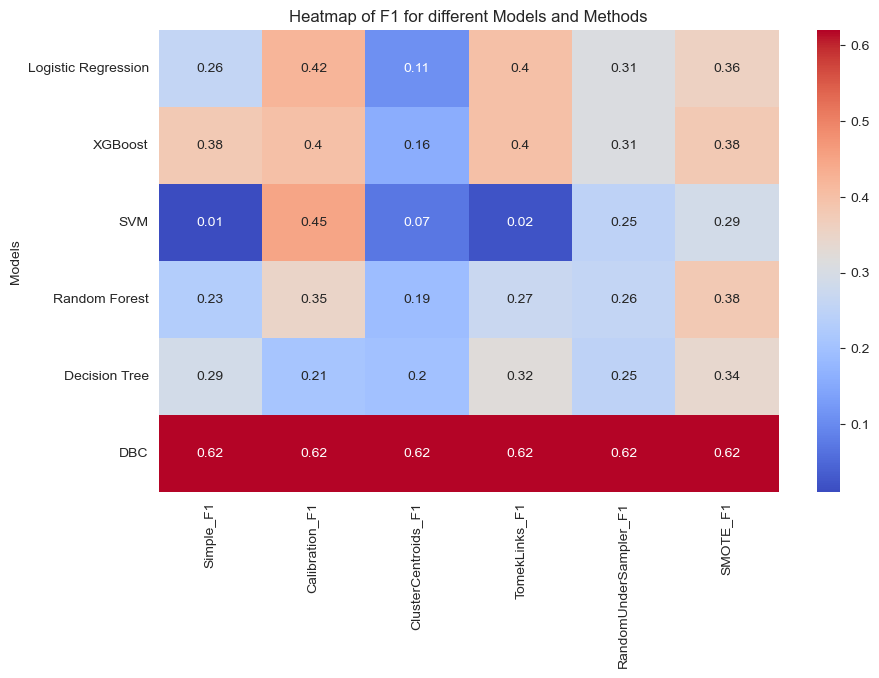

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# داده‌های متریک‌ها برای هر متود و مدل
data = {
    'Models': ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Decision Tree', 'DBC'],
    'Simple_Accuracy': [0.97, 0.97, 0.97, 0.97, 0.95, 0.92],
    'Calibration_Accuracy': [0.94, 0.94, 0.97, 0.95, 0.96, 0.92],
    'ClusterCentroids_Accuracy': [0.63, 0.73, 0.40, 0.80, 0.82, 0.92],
    'TomekLinks_Accuracy': [0.98, 0.98, 0.98, 0.97, 0.95, 0.92],
    'RandomUnderSampler_Accuracy': [0.90, 0.90, 0.86, 0.87, 0.87, 0.92],
    'SMOTE_Accuracy': [0.94, 0.95, 0.95, 0.95, 0.94, 0.92],

    'Simple_Precision': [0.63, 0.50, 0.10, 0.36, 0.24, 0.56],
    'Calibration_Precision': [0.29, 0.26, 0.46, 0.28, 0.25, 0.56],
    'ClusterCentroids_Precision': [0.06, 0.09, 0.04, 0.10, 0.11, 0.56],
    'TomekLinks_Precision': [0.49, 0.49, 0.07, 0.39, 0.26, 0.56],
    'RandomUnderSampler_Precision': [0.19, 0.19, 0.14, 0.15, 0.15, 0.56],
    'SMOTE_Precision': [0.25, 0.29, 0.24, 0.28, 0.24, 0.56],

    'Simple_Recall': [0.16, 0.31, 0.00, 0.18, 0.38, 0.85],
    'Calibration_Recall': [0.81, 0.84, 0.45, 0.50, 0.19, 0.85],
    'ClusterCentroids_Recall': [1.00, 0.99, 1.00, 0.99, 0.93, 0.85],
    'TomekLinks_Recall': [0.35, 0.35, 0.01, 0.22, 0.42, 0.85],
    'RandomUnderSampler_Recall': [0.92, 0.92, 0.96, 0.95, 0.89, 0.85],
    'SMOTE_Recall': [0.67, 0.58, 0.39, 0.59, 0.60, 0.85],

    'Simple_F1': [0.26, 0.38, 0.01, 0.23, 0.29, 0.62],
    'Calibration_F1': [0.42, 0.40, 0.45, 0.35, 0.21, 0.62],
    'ClusterCentroids_F1': [0.11, 0.16, 0.07, 0.19, 0.20, 0.62],
    'TomekLinks_F1': [0.40, 0.40, 0.02, 0.27, 0.32, 0.62],
    'RandomUnderSampler_F1': [0.31, 0.31, 0.25, 0.26, 0.25, 0.62],
    'SMOTE_F1': [0.36, 0.38, 0.29, 0.38, 0.34, 0.62],
}

# تبدیل داده‌ها به DataFrame
df = pd.DataFrame(data)

# ایجاد لیستی از متریک‌ها برای رسم هیت‌مپ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
methods = ['Simple', 'Calibration', 'ClusterCentroids', 'TomekLinks', 'RandomUnderSampler', 'SMOTE']

# رسم هیت‌مپ برای هر متریک
for metric in metrics:
    metric_data = df[['Models'] + [f'{method}_{metric}' for method in methods]].set_index('Models')
    
    # رسم هیت‌مپ
    plt.figure(figsize=(10, 6))
    sns.heatmap(metric_data, annot=True, cmap='coolwarm', cbar=True)
    plt.title(f'Heatmap of {metric} for different Models and Methods')
    plt.show()


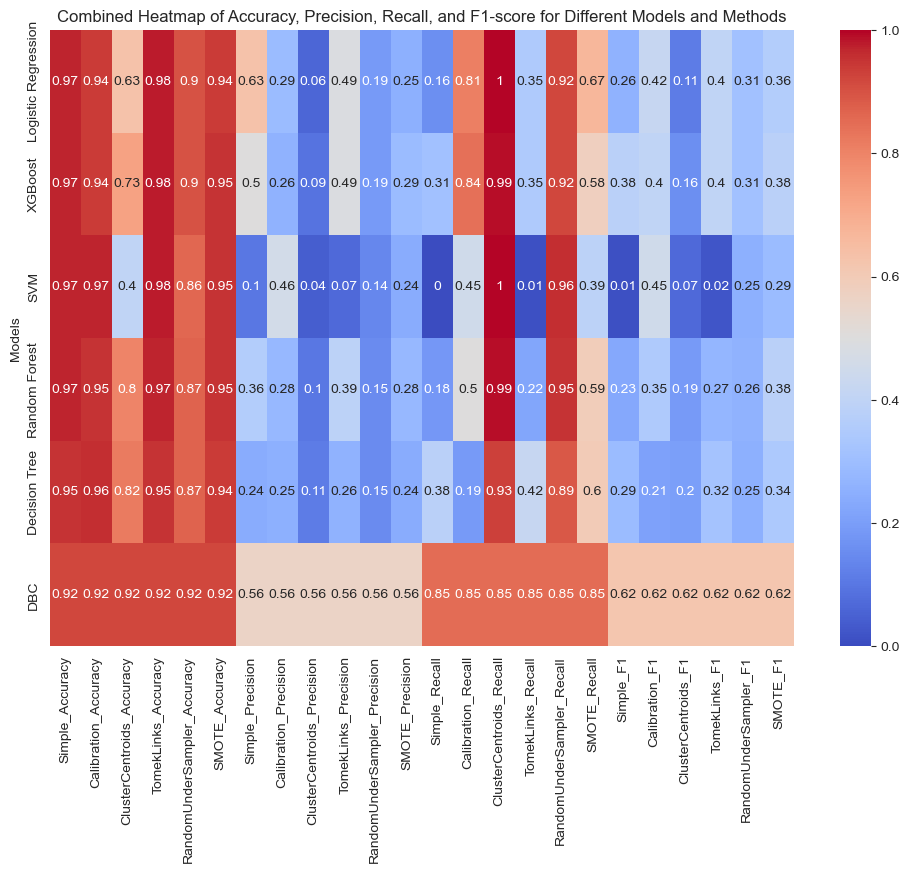

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# داده‌های متریک‌ها برای هر متود و مدل
data = {
    'Models': ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Decision Tree', 'DBC'],
    'Simple_Accuracy': [0.97, 0.97, 0.97, 0.97, 0.95, 0.92],
    'Calibration_Accuracy': [0.94, 0.94, 0.97, 0.95, 0.96, 0.92],
    'ClusterCentroids_Accuracy': [0.63, 0.73, 0.40, 0.80, 0.82, 0.92],
    'TomekLinks_Accuracy': [0.98, 0.98, 0.98, 0.97, 0.95, 0.92],
    'RandomUnderSampler_Accuracy': [0.90, 0.90, 0.86, 0.87, 0.87, 0.92],
    'SMOTE_Accuracy': [0.94, 0.95, 0.95, 0.95, 0.94, 0.92],

    'Simple_Precision': [0.63, 0.50, 0.10, 0.36, 0.24, 0.56],
    'Calibration_Precision': [0.29, 0.26, 0.46, 0.28, 0.25, 0.56],
    'ClusterCentroids_Precision': [0.06, 0.09, 0.04, 0.10, 0.11, 0.56],
    'TomekLinks_Precision': [0.49, 0.49, 0.07, 0.39, 0.26, 0.56],
    'RandomUnderSampler_Precision': [0.19, 0.19, 0.14, 0.15, 0.15, 0.56],
    'SMOTE_Precision': [0.25, 0.29, 0.24, 0.28, 0.24, 0.56],

    'Simple_Recall': [0.16, 0.31, 0.00, 0.18, 0.38, 0.85],
    'Calibration_Recall': [0.81, 0.84, 0.45, 0.50, 0.19, 0.85],
    'ClusterCentroids_Recall': [1.00, 0.99, 1.00, 0.99, 0.93, 0.85],
    'TomekLinks_Recall': [0.35, 0.35, 0.01, 0.22, 0.42, 0.85],
    'RandomUnderSampler_Recall': [0.92, 0.92, 0.96, 0.95, 0.89, 0.85],
    'SMOTE_Recall': [0.67, 0.58, 0.39, 0.59, 0.60, 0.85],

    'Simple_F1': [0.26, 0.38, 0.01, 0.23, 0.29, 0.62],
    'Calibration_F1': [0.42, 0.40, 0.45, 0.35, 0.21, 0.62],
    'ClusterCentroids_F1': [0.11, 0.16, 0.07, 0.19, 0.20, 0.62],
    'TomekLinks_F1': [0.40, 0.40, 0.02, 0.27, 0.32, 0.62],
    'RandomUnderSampler_F1': [0.31, 0.31, 0.25, 0.26, 0.25, 0.62],
    'SMOTE_F1': [0.36, 0.38, 0.29, 0.38, 0.34, 0.62],
}

# تبدیل داده‌ها به DataFrame
df = pd.DataFrame(data)

# برای ساده‌سازی ستون‌ها به نام‌هایی کوتاه‌تر تغییر نام می‌دهیم
df = df.set_index('Models')

# رسم هیت‌مپ
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Combined Heatmap of Accuracy, Precision, Recall, and F1-score for Different Models and Methods')
plt.show()
